In [0]:
%%sh
pip3 install detecto

In [0]:
import os
from google.colab import drive

In [0]:
os.chdir('/content/drive/My Drive/Detecto_Face')

In [0]:
from detecto import core, utils, visualize

In [0]:
#dataset = core.Dataset('train_faces/')
#model = core.Model(['jerry', 'tom'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [0]:
model

In [0]:
model.fit(dataset)

In [0]:
model.save('model_weights2.pth')

In [0]:
model = core.Model.load('model_weights2.pth', ['jerry', 'tom'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [0]:
# Specify the path to your image
image = utils.read_image('/content/drive/My Drive/Detecto_Face/train_faces/IMG_10000051n.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['jerry', 'tom']
print(labels) 

print(boxes)

print(scores)

['jerry']
tensor([[319.2653, 135.6636, 367.0414, 180.0141]])
tensor([0.9964])


In [0]:
from matplotlib import pyplot as plt
import cv2

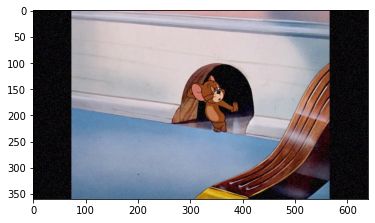

In [0]:
plt.imshow(image)

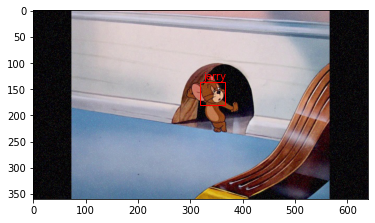

In [0]:
visualize.show_labeled_image(image, boxes, labels)

In [0]:
boxes,labels

(tensor([[320.7363, 134.2356, 367.0072, 180.2122]]), ['jerry'])

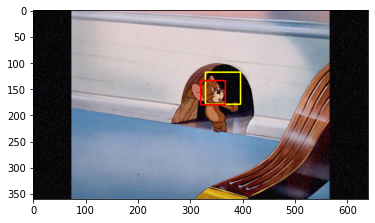

In [0]:
cv2.rectangle(image,(320, 134),(367, 180),(255,0,0),2)
plt.imshow(image)

In [0]:
def getCroppedImage(box,img):
  box=[int(item) for item in box]
  left,top,right,bottom=box[0],box[1],box[2],box[3]
  #print(left,right,top,bottom)
  crop_img=img[top:bottom,left:right]

  return crop_img

In [0]:
def CropImages(path_src,path_target):
  src_images=os.listdir(path_src)
  src_images= [os.path.join(path_src,f) for f in src_images if f.endswith('.jpg')]
  for item in src_images:
    image = utils.read_image(item)
    labels, boxes, scores = model.predict(image)
    if(len(boxes)!=0):
      crop_img = getCroppedImage(boxes[0],image)
      print(os.path.basename(item))
      cv2.imwrite(os.path.join(path_target,os.path.basename(item)),crop_img)

In [0]:
!unzip '/content/drive/My Drive/Detecto_Face/046b0766-9dd2-45b5-acd2-29d714604d12_test.zip'

In [0]:
!unzip  '/content/drive/My Drive/Detecto_Face/7632a1cf-95f9-4d1c-bc5b-9436699bdae2_train.zip'

In [0]:
#!mkdir ntrain_faces
#!mkdir ntest_faces

train_path_src='/content/drive/My Drive/Detecto_Face/ntrain'
train_path_target='/content/drive/My Drive/Detecto_Face/ntrain_faces'

test_path_src='/content/drive/My Drive/Detecto_Face/ntest'
test_path_target='/content/drive/My Drive/Detecto_Face/ntest_faces'

In [0]:
#5CropImages(train_path_src,train_path_target)
print('Detected faces in training images')

In [0]:
len(os.listdir(train_path_src)),len(os.listdir(train_path_target))

(1941, 1599)

In [0]:
#CropImages(test_path_src,test_path_target)
print('Detected faces in test images')

In [0]:
len(os.listdir(test_path_src)),len(os.listdir(test_path_target))

(275, 238)